In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
xm_values = [0.0, 0.0209150326797386, 0.0418300653594772, 0.0627450980392158, 0.0836601307189544, 0.104575163398693, 0.1254901960784316, 0.1464052287581702, 0.1673202614379088, 0.1882352941176474, 0.209150326797386, 0.2300653594771246, 0.2509803921568632, 0.2718954248366018, 0.2928104575163404, 0.313725490196079, 0.3346405228758176, 0.3555555555555562, 0.3764705882352948, 0.3973856209150334, 0.418300653594772, 0.4392156862745106, 0.4601307189542492, 0.4810457516339878, 0.5019607843137264, 0.522875816993465, 0.5437908496732036, 0.5647058823529422, 0.5856209150326808, 0.6065359477124194, 0.627450980392158, 0.6483660130718966, 0.6692810457516352, 0.6901960784313736, 0.7111111111111124, 0.7320261437908511, 0.7529411764705896, 0.773856209150328, 0.7947712418300668, 0.8156862745098055, 0.836601307189544, 0.8575163398692824, 0.8784313725490211, 0.8993464052287599, 0.9202614379084983, 0.9411764705882368, 0.9620915032679755, 0.9830065359477143, 1.0039215686274527, 1.0248366013071912, 1.04575163398693, 1.0666666666666687, 1.0875816993464071, 1.1084967320261456, 1.1294117647058843, 1.150326797385623, 1.1712418300653615, 1.1921568627451, 1.2130718954248387, 1.2339869281045774, 1.254901960784316, 1.2758169934640544, 1.2967320261437931, 1.3176470588235318, 1.3385620915032703, 1.3594771241830088, 1.3803921568627473, 1.4013071895424862, 1.4222222222222247, 1.4431372549019632, 1.4640522875817021, 1.4849673202614406, 1.5058823529411791, 1.5267973856209176, 1.547712418300656, 1.568627450980395, 1.5895424836601335, 1.610457516339872, 1.631372549019611, 1.6522875816993494, 1.673202614379088, 1.6941176470588264, 1.7150326797385649, 1.7359477124183038, 1.7568627450980423, 1.7777777777777808, 1.7986928104575197, 1.8196078431372582, 1.8405228758169967, 1.8614379084967352, 1.8823529411764737, 1.9032679738562126, 1.924183006535951, 1.9450980392156896, 1.9660130718954285, 1.986928104575167, 2.0078431372549055, 2.028758169934644, 2.0496732026143825, 2.0705882352941214, 2.09150326797386, 2.1124183006535984, 2.1333333333333373, 2.154248366013076, 2.1751633986928143, 2.1960784313725528, 2.2169934640522913, 2.23790849673203, 2.2588235294117687, 2.279738562091507, 2.300653594771246, 2.3215686274509846, 2.342483660130723, 2.3633986928104616, 2.3843137254902, 2.405228758169939, 2.4261437908496775, 2.447058823529416, 2.467973856209155, 2.4888888888888934, 2.509803921568632, 2.5307189542483703, 2.551633986928109, 2.5725490196078478, 2.5934640522875863, 2.6143790849673247, 2.6352941176470637, 2.656209150326802, 2.6771241830065406, 2.698039215686279, 2.7189542483660176, 2.739869281045756, 2.7607843137254946, 2.781699346405234, 2.8026143790849725, 2.823529411764711, 2.8444444444444494, 2.865359477124188, 2.8862745098039264, 2.907189542483665, 2.9281045751634043, 2.9490196078431428, 2.9699346405228813, 2.9908496732026197, 3.0117647058823582, 3.0326797385620967, 3.053594771241835, 3.0745098039215737, 3.095424836601312, 3.1163398692810516, 3.13725490196079, 3.1581699346405285, 3.179084967320267, 3.2000000000000055, 3.220915032679744, 3.2418300653594825, 3.262745098039222, 3.2836601307189603, 3.304575163398699, 3.3254901960784373, 3.346405228758176, 3.3673202614379143, 3.388235294117653, 3.4091503267973913, 3.4300653594771298, 3.450980392156869, 3.4718954248366076, 3.492810457516346, 3.5137254901960846, 3.534640522875823, 3.5555555555555616, 3.5764705882353, 3.5973856209150394, 3.618300653594778, 3.6392156862745164, 3.660130718954255, 3.6810457516339934, 3.701960784313732, 3.7228758169934704, 3.743790849673209, 3.7647058823529473, 3.7856209150326867, 3.806535947712425, 3.8274509803921637, 3.848366013071902, 3.8692810457516407, 3.890196078431379, 3.9111111111111176, 3.932026143790857, 3.9529411764705955, 3.973856209150334, 3.9947712418300725, 4.015686274509811, 4.0366013071895495, 4.057516339869288, 4.078431372549026, 4.099346405228765, 4.120261437908504, 4.141176470588243, 4.162091503267981, 4.18300653594772, 4.203921568627458, 4.224836601307197, 4.245751633986935, 4.266666666666675, 4.287581699346413, 4.308496732026152, 4.32941176470589, 4.3503267973856286, 4.371241830065367, 4.3921568627451055, 4.413071895424844, 4.4339869281045825, 4.454901960784322, 4.47581699346406, 4.496732026143799, 4.517647058823537, 4.538562091503276, 4.559477124183014, 4.580392156862753, 4.601307189542492, 4.622222222222231, 4.643137254901969, 4.664052287581708, 4.684967320261446, 4.705882352941185, 4.726797385620923, 4.747712418300662, 4.7686274509804, 4.7895424836601395, 4.810457516339878, 4.831372549019616, 4.852287581699355, 4.873202614379093, 4.894117647058832, 4.91503267973857, 4.93594771241831, 4.956862745098048, 4.977777777777787, 4.998692810457525, 5.019607843137264, 5.040522875817002, 5.061437908496741, 5.082352941176479, 5.103267973856218, 5.124183006535957, 5.1450980392156955, 5.166013071895434, 5.1869281045751725, 5.207843137254911, 5.2287581699346495, 5.249673202614388, 5.270588235294127, 5.291503267973866, 5.312418300653604, 5.333333333333343]
integral_values = [0.0, 0.009262620668846627, 0.016905762993954167, 0.023362071040424856, 0.02885797857186461, 0.03354824110552846, 0.03754922044401394, 0.040953078171202785, 0.043835243706541106, 0.046258858454727894, 0.048277648352147075, 0.049937894765022625, 0.05127984935912048, 0.05233878655447994, 0.05314580896178875, 0.053728478785696435, 0.05411132199880969, 0.05431623818819579, 0.05436283813924407, 0.05426872540110309, 0.054049733605432776, 0.053720128353044856, 0.05329278033166179, 0.05277931486990137, 0.052190241920483646, 0.05153506969671896, 0.05082240451496314, 0.05006003891751319, 0.04925502976983066, 0.04841376772794753, 0.04754203923645113, 0.04664508202551502, 0.04572763492713165, 0.04479398270175297, 0.043847996467124235, 0.042893170235960294, 0.04193265399913408, 0.04096928373242268, 0.04000560865553811, 0.03904391603045646, 0.03808625375059887, 0.03713445094212919, 0.03619013677264495, 0.03525475764014422, 0.03432959289577788, 0.03341576923707102, 0.03251427389363344, 0.0316259667145543, 0.03075159125542347, 0.02989178495301976, 0.02904708846696539, 0.028217954259909875, 0.027404754480941637, 0.026607788210818453, 0.025827288122162166, 0.02506342660289572, 0.024316321386841866, 0.02358604073149065, 0.02287260817942527, 0.022176006936727114, 0.021496183897384225, 0.0208330533516374, 0.02018650037362712, 0.01955638396204433, 0.018942539904984394, 0.0183447834189136, 0.01776291156983185, 0.017196705494755885, 0.016645932438884084, 0.016110347622591357, 0.015589695951294492, 0.015083713580212918, 0.01459212934511991, 0.014114666069326019, 0.013651041756353314, 0.013200970677039122, 0.012764164359146542, 0.012340332486949617, 0.01192918371770071, 0.0115304264213705, 0.011143769349574673, 0.010768922239161859, 0.010405596355531344, 0.010053504980374252, 0.009712363848185643, 0.009381891535574366, 0.009061809806986168, 0.008751843920992, 0.008451722898601938, 0.008161179758893961, 0.007879951723054578, 0.007607780389564417, 0.007344411884070343, 0.0070895969843608395, 0.006843091223831434, 0.006604654974761475, 0.006374053513235309, 0.006151057067318053, 0.005935440849976643, 0.005726985078126026, 0.0055254749790775185, 0.005330700785570619, 0.0051424577204809635, 0.004960545972214511, 0.004784770661721414, 0.004614941801992037, 0.004450874250831249, 0.004292387657645851, 0.0041393064049228675, 0.003991459545023396, 0.003848680732867544, 0.0037108081550401993, 0.0035776844558048216, 0.003449156660473146, 0.003325076096541904, 0.003205298312973749, 0.003089682997967942, 0.0029780938955370757, 0.0028703987211789396, 0.002766469076907389, 0.002666180365882649, 0.002569411706859896, 0.002476045848654772, 0.002385969084805902, 0.002299071168581317, 0.002215245228571068, 0.0021343876847600366, 0.0020563981655156785, 0.001981179425360428, 0.0019086372637166919, 0.0018386804446922566, 0.0017712206179795293, 0.0017061722409328266, 0.001643452501879528, 0.0015829812447131111, 0.001524680894808908, 0.0014684763862969326, 0.0014142950907200134, 0.0013620667470999937, 0.0013117233934296685, 0.001263199299603524, 0.0012164309017961064, 0.0011713567382919936, 0.001127917386773964, 0.0010860554030568746, 0.001045715261274209, 0.0010068432955035811, 0.0009693876428233177, 0.0009332981877883142, 0.0008985265083115722, 0.0008650258229361581, 0.0008327509394807726, 0.0008016582050408539, 0.0007717054573258969, 0.0007428519773127036, 0.0007150584431933466, 0.0006882868855959086, 0.0006625006440553825, 0.0006376643247115832, 0.0006137437592105044, 0.000590705964785165, 0.0005685191054917462, 0.0005471524545766134, 0.0005265763579496922, 0.000506762198739606, 0.00048768236290765214, 0.0004693102058857165, 0.0004516200202401982, 0.0004345870043013104, 0.00041818723176152006, 0.0004023976222077237, 0.00038719591256539636, 0.0003725606294312634, 0.0003584710622713332, 0.00034490723746143104, 0.0003318498931477242, 0.0003192804549050505, 0.00030718101217124005, 0.00029553429543598646, 0.00028432365416320663, 0.00027353303542622284, 0.00026314696323549746, 0.00025315051853905853, 0.0002435293198761556, 0.00023426950466510992, 0.00022535771110672478, 0.00021678106068504302, 0.00020852714124765137, 0.00020058399064814604, 0.00019294008093378716, 0.00018558430306177265, 0.0001785059521279816, 0.00017169471309242727, 0.00016514064698606738, 0.00015883417758401125, 0.0001527660785305521, 0.00014692746090184036, 0.00014130976119238885, 0.00013590472971197867, 0.00013070441937989457, 0.00012570113801250923, 0.00012088762233080971, 0.00011625665895902055, 0.00011180144359739437, 0.0001075153871631066, 0.00010339214360509368, 9.942560114320198e-05, 9.560987381256235e-05, 9.193929330312406e-05, 8.84084010845866e-05, 8.501194080725967e-05, 8.174485096966425e-05, 7.860225784397171e-05, 7.557946865064344e-05, 7.267196497390423e-05, 6.987539640993548e-05, 6.718557443993204e-05, 6.459846652040613e-05, 6.211019038336395e-05, 5.971700853921131e-05, 5.7415322975471324e-05, 5.5201670044617964e-05, 5.3072715534539446e-05, 5.1025249915359566e-05, 4.905618375654064e-05, 4.716254330839271e-05, 4.534146624230185e-05, 4.3590197544176825e-05, 4.1906085555792514e-05, 4.0286578158883724e-05, 3.8729219097012e-05, 3.7231644430392e-05, 3.579157911902495e-05, 3.440683372963969e-05, 3.307530126209296e-05, 3.179495409102521e-05, 3.056384101870994e-05, 2.9380084435170972e-05, 2.8241877581773384e-05, 2.7147481914624352e-05, 2.6095224564242103e-05, 2.508349588807305e-05, 2.4110747112552875e-05, 2.317548806152071e-05, 2.2276284967904584e-05, 2.1411758365702035e-05, 2.0580581059382345e-05, 1.9781476167935362e-05, 1.90132152408887e-05, 1.8274616443706893e-05, 1.7564542810076116e-05, 1.6881900558665156e-05, 1.6225637472036554e-05, 1.5594741335463943e-05, 1.498823843348873e-05, 1.4405192102126802e-05]



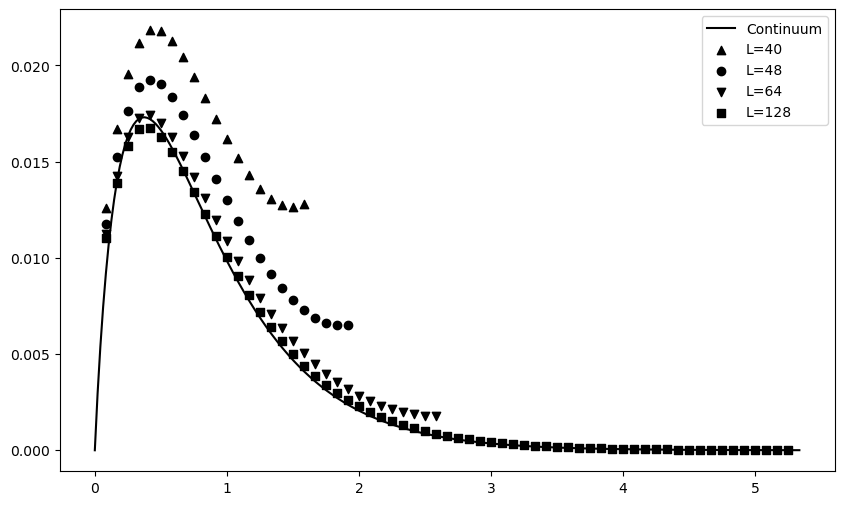

In [20]:
fig, ax = plt.subplots(figsize=(10, 6))

scale = 1/np.pi
ax.plot(xm_values, scale*np.array(integral_values), label='Continuum', color='black')

L = 32
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022]
xG00_lattice = [0.014425675000000028, 0.019981486666666704, 0.023954100000000048, 0.026438133333333374, 0.027726083333333373, 0.028163050000000054, 0.02802805833333339, 0.02754280000000005, 0.026878125000000048, 0.026182666666666722, 0.025569500000000044, 0.025149900000000044, 0.025023808333333373, 0.025289950000000044, 0.02604962500000004]
# ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='o', color='black')

L = 40
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361]
xG00_lattice = [0.012583435000000025, 0.016693663333333365, 0.019544580500000033, 0.0211776666666667, 0.02182445833333338, 0.021769850000000035, 0.02124505833333338, 0.020418600000000037, 0.01941555000000003, 0.018327000000000034, 0.01722526666666669, 0.01616170000000003, 0.015181183333333367, 0.014317683333333359, 0.013601125000000023, 0.01306186666666669, 0.01272889166666669, 0.01263390000000002, 0.012812333333333356]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='^', color='black')

L = 48
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667]
xG00_lattice = [0.011777755166666681, 0.015258456666666687, 0.01762003300000003, 0.0188819166666667, 0.01925560833333337, 0.019007340000000032, 0.01835275750000004, 0.01743987333333337, 0.01638166500000003, 0.015251691666666697, 0.014105400833333358, 0.012982060000000021, 0.011908920833333355, 0.01090490333333335, 0.009982800000000016, 0.009154226666666683, 0.00842427916666668, 0.007800690000000013, 0.007290505833333344, 0.006898733333333347, 0.006634775000000014, 0.00650765500000001, 0.006531425000000013]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='o', color='black')

L = 64
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338]
xG00_lattice = [0.011219178500000015, 0.014252974333333347, 0.016258074850000026, 0.01724357400000003, 0.017414067500000033, 0.017021202600000035, 0.016269170166666694, 0.015302953333333359, 0.014219392500000025, 0.013092425000000019, 0.011962756666666689, 0.01086718000000002, 0.009824045833333354, 0.008844815000000018, 0.007936462500000014, 0.007102440000000016, 0.006342062500000009, 0.00565242000000001, 0.0050323241666666765, 0.004477423333333342, 0.003984027250000007, 0.003548301166666673, 0.003166776083333339, 0.0028361660000000054, 0.0025537958333333383, 0.0023169033333333366, 0.002124396000000004, 0.0019751643333333372, 0.0018687962500000045, 0.0018061975000000028, 0.0017893200000000035]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='v', color='black')

L = 128
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009]
xG00_lattice = [0.011038219550833351, 0.013909141795666689, 0.015787702079000036, 0.016672130620666713, 0.01675909320833336, 0.016304820096700028, 0.015506612108166687, 0.014506780636400025, 0.013406642091000018, 0.012273146333333346, 0.011146736087666692, 0.010061666393000013, 0.009035014679166682, 0.008078084793333348, 0.0071956168500000115, 0.006389205733333346, 0.005657694123333342, 0.00499694977500001, 0.004404668476666672, 0.0038740828166666727, 0.003402294017500008, 0.0029831199383333383, 0.002612041996666671, 0.0022841113200000045, 0.0019950652291666707, 0.0017406813883333368, 0.001517312857500003, 0.0013213462266666695, 0.0011498468825000031, 0.0009998561250000016, 0.0008687208016666682, 0.0007543263200000014, 0.000654572737500001, 0.000567662895000001, 0.0004920346666666674, 0.000426270540000001, 0.0003690956275000006, 0.0003194423450000007, 0.00027636212500000047, 0.00023895080000000071, 0.00020654811558333365, 0.00017847142950000043, 0.00015415762300000028, 0.0001331107946666669, 0.00011489990625000016, 9.915629283333349e-05, 8.555329708333348e-05, 7.380938000000016e-05, 6.367710883333347e-05, 5.494882916666672e-05, 4.743940525000006e-05, 4.098208833333342e-05, 3.545590025000006e-05, 3.0735432000000066e-05, 2.672156666666672e-05, 2.3333025333333387e-05, 2.0496482750000045e-05, 1.8156286166666688e-05, 1.6266103333333365e-05, 1.478916500000003e-05, 1.3699822250000023e-05, 1.2980857333333352e-05, 1.2625567500000026e-05]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='s', color='black')


ax.legend()


In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

scale = 1/np.pi
ax.plot(xm_values, scale*np.array(integral_values), label='Continuum', color='black')

L = 40
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361]
xG00_lattice = [0.010104216666666686, 0.012123333333333352, 0.01323855000000003, 0.01345596666666669, 0.01297700000000002, 0.012052920000000019, 0.010878781666666684, 0.009589121333333351, 0.008274855000000015, 0.006995050000000014, 0.005785253833333346, 0.00467091200000001, 0.003664849500000007, 0.002774419666666672, 0.0020032117500000035, 0.0013555013333333356, 0.0008347878333333343, 0.00044855400000000107, 0.0002065585000000004]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='^', color='black')

L = 48
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667]
xG00_lattice = [0.010565366666666695, 0.012996716666666694, 0.014479345000000018, 0.015006900000000028, 0.014790425000000032, 0.014077960000000021, 0.013067955833333356, 0.011902700000000021, 0.010674952500000019, 0.009449714000000017, 0.008266160833333352, 0.007152602000000013, 0.006123439833333344, 0.0051862486666666725, 0.004344267500000008, 0.003596824000000006, 0.0029425385000000056, 0.0023785650000000044, 0.0019027170000000034, 0.001513886000000003, 0.0012118337000000025, 0.0009985140000000018, 0.000878707333333335]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='o', color='black')

L = 64
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338]
xG00_lattice = [0.010907985000000025, 0.013667706666666684, 0.015438045000000036, 0.01622277333333336, 0.01622184583333336, 0.01569112500000002, 0.01482866233333336, 0.013777917333333353, 0.012633861000000026, 0.011468433333333354, 0.010318751116666688, 0.009219078000000016, 0.00818584433333335, 0.00722819486666668, 0.006351613000000011, 0.005555577600000012, 0.004838269416666674, 0.004196201400000007, 0.0036257570166666735, 0.0031196753333333385, 0.0026752334000000044, 0.0022861633666666705, 0.001948007616666671, 0.001656366400000003, 0.0014074625000000027, 0.0011983304666666687, 0.0010260832500000015, 0.0008890607600000016, 0.0007862296333333347, 0.0007173435000000013, 0.0006831888500000011]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='v', color='black')

L = 128
xm_lattice = [0.08333333333333348, 0.16666666666666696, 0.25000000000000044, 0.3333333333333339, 0.4166666666666674, 0.5000000000000009, 0.5833333333333344, 0.6666666666666679, 0.7500000000000013, 0.8333333333333348, 0.9166666666666683, 1.0000000000000018, 1.0833333333333353, 1.1666666666666687, 1.2500000000000022, 1.3333333333333357, 1.4166666666666692, 1.5000000000000027, 1.5833333333333361, 1.6666666666666696, 1.750000000000003, 1.8333333333333366, 1.91666666666667, 2.0000000000000036, 2.083333333333337, 2.1666666666666705, 2.250000000000004, 2.3333333333333375, 2.416666666666671, 2.5000000000000044, 2.583333333333338, 2.6666666666666714, 2.750000000000005, 2.8333333333333384, 2.916666666666672, 3.0000000000000053, 3.083333333333339, 3.1666666666666723, 3.2500000000000058, 3.3333333333333393, 3.4166666666666727, 3.500000000000006, 3.5833333333333397, 3.666666666666673, 3.7500000000000067, 3.83333333333334, 3.9166666666666736, 4.000000000000007, 4.083333333333341, 4.166666666666674, 4.250000000000007, 4.333333333333341, 4.416666666666675, 4.500000000000008, 4.583333333333341, 4.666666666666675, 4.750000000000009, 4.833333333333342, 4.916666666666675, 5.000000000000009, 5.083333333333343, 5.166666666666676, 5.250000000000009]
xG00_lattice = [0.01103660322250004, 0.013906561473333353, 0.015782862057500027, 0.016666050536666723, 0.01675265713333336, 0.016296765115000028, 0.01549825988666669, 0.014497866613333353, 0.013397007712500028, 0.012259006541666697, 0.011135197470833354, 0.010049344040000017, 0.009023527987500014, 0.00806622032766668, 0.007183716585000007, 0.006377068696000014, 0.0056448338273333435, 0.004984817712000007, 0.004392345668833343, 0.0038624339133333406, 0.003390820335000004, 0.0029721102029666713, 0.002601242342833337, 0.0022737470510000033, 0.00198502647916667, 0.001731126229300003, 0.0015081770880000021, 0.0013126807166666692, 0.0011414737985333348, 0.0009918602400000019, 0.0008612337436666684, 0.0007472022789333347, 0.0006478291682500014, 0.0005613159625666676, 0.0004860686973333345, 0.0004206462780000008, 0.00036384049160000066, 0.0003145382935700006, 0.00027175199025000036, 0.00023466868733333375, 0.0002025596041500003, 0.00017474447830000036, 0.00015068237375000023, 0.00012987017853333355, 0.00011188935075000017, 9.635495340000016e-05, 8.295159015000013e-05, 7.13846336000001e-05, 6.142131216666676e-05, 5.2844218333333446e-05, 4.546814560000007e-05, 3.914399753333342e-05, 3.3727411250000055e-05, 2.9108078730000055e-05, 2.518343978333337e-05, 2.1870462245333386e-05, 1.9101567730000038e-05, 1.681651507000003e-05, 1.4969886116666693e-05, 1.352583630000002e-05, 1.2457736996666692e-05, 1.1749036476666684e-05, 1.1392281085500023e-05]
ax.scatter(xm_lattice, xG00_lattice, label=f'L={L}', marker='s', color='black')


ax.legend()
